# Ejercicio 5: Muestrear la distribución exponencial inversa y la distribución beta usando metropolis hasting

Primero la distribución exponencial inversa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

#Primero vamos a muestrear la inversa. Definimos la función.

def inverse(x, l=10):
    if(np.isscalar(x)):# esto va a funcionar si entra un numero (escalar)
        if x>1E-6:
            #Esta es la fórmula de la distribución. 
            #Ver: http://shodhganga.inflibnet.ac.in/bitstream/10603/149312/8/08_chapter%203.pdf
            y = l*(1/x**2)*np.exp(-l/x) 
        else:
            y = 0.0 #La función solo está definida para x positivos.
    else: # esto funciona si es un array
        y = l*(1/x**2)*np.exp(-l/x)
        ii = x<1E-6
        y[ii] = 0
    return y

In [9]:
def metropolis(N=100000):
    #Iniciamos con un numero aleatorio
    lista = [np.random.random()]
    sigma_delta = 4.0

    for i in range(1,N):
        #Proponemos un número x2 que viene del anterior pero con un salto dx.
        #El dx viene de una gaussiana centrada en cero y desviación la que queramos.
        propuesta  = lista[i-1] + np.random.normal(loc=0.0, scale=sigma_delta)
        
        #Comparamos la propuesta con el anterior. No queremos que la razón sea mayor a 1.
        r = min(1,inverse(propuesta)/inverse(lista[i-1]))
        #Generamos un número aleatorio entre 0 y 1.
        alpha = np.random.random()
        #Si es menor lo metemos a la lista.
        if(alpha<r):
            lista.append(propuesta)
        #Sino, dejamos el anterior.
        else:
            lista.append(lista[i-1])
            
    return np.array(lista)

#Llamamos la cadena
cadena = metropolis()


Text(0,0.5,'PDF(x)')

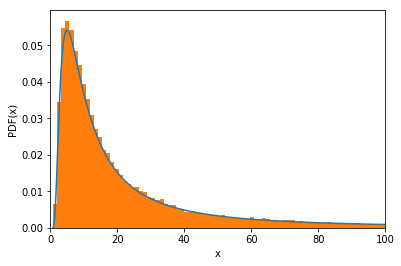

In [10]:
#Comparamos el histograma de puntos generados con la función.
x = np.linspace(cadena.min(),cadena.max(),1000)
plt.plot(x, inverse(x))
plt.hist(cadena, density=True, bins=200)
plt.xlim([0,100])
plt.xlabel('x')
plt.ylabel('PDF(x)')

Ahora la beta

In [11]:
def beta(x,a=2.0,b=2.0):
    #Esta es la fórmula de la distribución.
    y=(gamma(a+b)/gamma(a)*gamma(b))*x**((a-1))*(1-x)**((b-1))
    return y

In [12]:
def metropolis_beta(N=100000):
    #Iniciamos con un numero aleatorio
    lista = [np.random.random()]
    sigma_delta = 4.0

    for i in range(1,N):
        #Proponemos un número x2 que viene del anterior pero con un salto dx.
        #El dx viene de una gaussiana centrada en cero y desviación la que queramos.
        propuesta  = lista[i-1] + np.random.normal(loc=0.0, scale=sigma_delta)
        
        #Comparamos la propuesta con el anterior. No queremos que la razón sea mayor a 1.
        r = min(1,beta(propuesta)/beta(lista[i-1]))
        #Generamos un número aleatorio entre 0 y 1.
        alpha = np.random.random()
        #Si es menor lo metemos a la lista.
        if(alpha<r):
            lista.append(propuesta)
        #Sino, dejamos el anterior.
        else:
            lista.append(lista[i-1])
            
    return np.array(lista)

#Llamamos la cadena
cadena_beta = metropolis_beta()

Text(0,0.5,'PDF(x)')

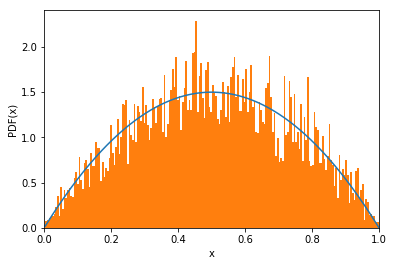

In [13]:
#Comparamos el histograma de puntos generados con la función.
x = np.linspace(cadena_beta.min(),cadena_beta.max(),1000)
plt.plot(x, beta(x))
plt.hist(cadena_beta, density=True, bins=200)
plt.xlim([0,1])
plt.xlabel('x')
plt.ylabel('PDF(x)')